# Infos

source
- https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
- https://openweathermap.org/

# import packages

In [1]:
#import pandas as pd
#import numpy as np
#import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
#import requests, json 
from  myfunc import get_api_data, weather_data_call,format_forecast
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# import API Key

In [2]:
# use self made func
data=get_api_data("api_data/info.txt")
#arrange data
api_key=data[0][:-1]
#base_url_current=data[1][:-1]
base_url_forcast=data[2][:-1]
city_name=data[3][:-1]

# Get Data via API Call

In [3]:
request=weather_data_call(api_key,base_url_forcast,city_name)

In [4]:
#see result
#request.content
request.json()

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1585656000,
   'main': {'temp': 278.77,
    'feels_like': 275.14,
    'temp_min': 277.97,
    'temp_max': 278.77,
    'pressure': 1030,
    'sea_level': 1030,
    'grnd_level': 1025,
    'humidity': 61,
    'temp_kf': 0.8},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 51},
   'wind': {'speed': 2.09, 'deg': 347},
   'sys': {'pod': 'd'},
   'dt_txt': '2020-03-31 12:00:00'},
  {'dt': 1585666800,
   'main': {'temp': 279.1,
    'feels_like': 274.96,
    'temp_min': 278.5,
    'temp_max': 279.1,
    'pressure': 1029,
    'sea_level': 1029,
    'grnd_level': 1023,
    'humidity': 60,
    'temp_kf': 0.6},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04d'}],
   'clouds': {'all': 100},
   'wind': {'speed': 2.83, 'deg': 315},
   'sys': {'pod': 'd'},
   'dt_txt': '2020-03-31 15:00:00'},
  {'dt': 158

# export CSV 

## Format result

In [5]:
df_weather=format_forecast(request)

In [6]:
df_weather.head()

,temp,humidity,pressure,wind_speed,wind_dir,cloudcoverage,weather,description,icon
datetime,,,,,,,,,
2020-03-31 12:00:00,5.62,61,1030,2.09,347,51,Clouds,broken clouds,04d
2020-03-31 15:00:00,5.95,60,1029,2.83,315,100,Clouds,overcast clouds,04d
2020-03-31 18:00:00,3.02,75,1028,2.27,302,89,Clouds,overcast clouds,04n
2020-03-31 21:00:00,1.42,82,1028,1.90,258,0,Clear,clear sky,01n
2020-04-01 00:00:00,0.25,86,1026,3.21,245,0,Clear,clear sky,01n


## Export to csv

In [9]:
export_file_name=''
export_file_name='forecast/forcast_'+str(df_weather.index[0]).replace(' ','_').replace(':','-')+'.csv'
export_file_name

'forecast/forcast_2020-03-31_12-00-00.csv'

In [10]:
df_weather.to_csv(export_file_name,sep=',')

## Plot

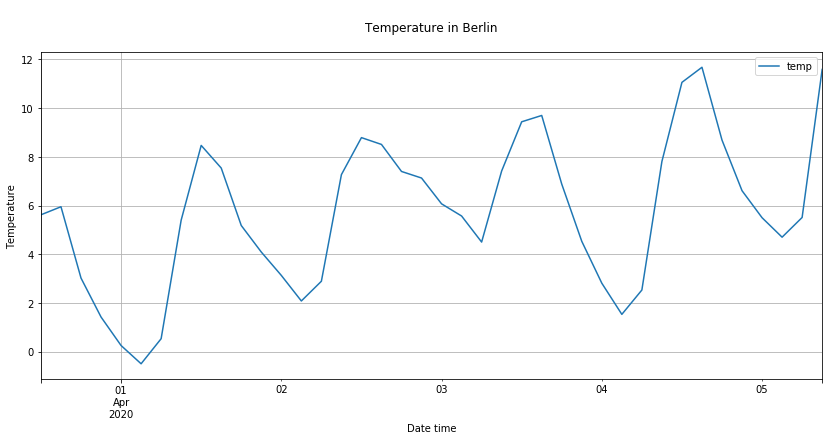

In [11]:
if True:
    plt.figure(figsize=(14,6))
    df_weather['temp'].plot()
    plt.xlabel('Date time')
    plt.ylabel('Temperature')
    plt.title('\nTemperature in Berlin\n')
    plt.grid()
    plt.legend()
    plt.show()

# Export Json database

In [9]:
#print
#request.content
#request.json()

In [10]:
#write Json
export_file_name=''
export_file_name='forecast/forcast_'+str(df_weather.index[0]).replace(' ','_').replace(':','-')+'.json'

In [11]:
with open(export_file_name, 'wb') as f:
    f.write(request.content)

In [12]:
#read Json
with open(export_file_name) as json_file:
    data = json.load(json_file)
    i=0
    for p in data['list']:
        if i<5:
            print(p['main']['temp'])
        i+=1
        
        

282.35
280.89
277.78
275.9
274.23


# google API

In [12]:
#authentication to google api using JSON credential file
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('api_data/WDcred.json', scope)
client = gspread.authorize(creds)

In [13]:
#get current weather berlin sheet
forecast_weather = client.open('forcast_weater_berlin')

In [15]:
#see the content of the file
forecast_weather.sheet1.get_all_values()

[['datetime', 'temp', 'humidity', 'wind_speed', 'wind_dir', 'weather'],
 ['2020-03-13 15:00:00', '9.2', '66', '9.29', '268', 'Rain'],
 ['2020-03-13 18:00:00', '7.74', '68', '7.48', '279', 'Rain'],
 ['2020-03-13 21:00:00', '4.63', '64', '7.17', '291', 'Clear'],
 ['2020-03-14 0:00:00', '2.75', '73', '4.72', '306', 'Clouds'],
 ['2020-03-14 3:00:00', '1.08', '74', '3.14', '321', 'Clouds'],
 ['2020-03-14 6:00:00', '0.45', '71', '1.55', '335', 'Clear'],
 ['2020-03-14 9:00:00', '4.56', '40', '0.46', '175', 'Clear'],
 ['2020-03-14 12:00:00', '7.15', '31', '0.4', '107', 'Clear'],
 ['2020-03-14 15:00:00', '7.26', '30', '1.9', '116', 'Clear'],
 ['2020-03-14 18:00:00', '4.52', '45', '3.7', '126', 'Clouds'],
 ['2020-03-14 21:00:00', '2.84', '48', '4.03', '143', 'Clear'],
 ['2020-03-15 0:00:00', '1.8', '49', '4.76', '153', 'Clear'],
 ['2020-03-15 3:00:00', '1.11', '55', '4.62', '158', 'Clear'],
 ['2020-03-15 6:00:00', '0.95', '56', '4.99', '162', 'Clear'],
 ['2020-03-15 9:00:00', '5.47', '41', '5.52

In [ ]:
#rewrite data

In [ ]:
forecast_weather.sheet1.update()

{'spreadsheetId': '1Us3ubvtweNTf6NncVXHeW6XX5DeeJ8D4lvAfP6le1GQ',
 'tableRange': 'current_weater_berlin!A1:L2',
 'updates': {'spreadsheetId': '1Us3ubvtweNTf6NncVXHeW6XX5DeeJ8D4lvAfP6le1GQ',
  'updatedRange': 'current_weater_berlin!A3:L3',
  'updatedRows': 1,
  'updatedColumns': 12,
  'updatedCells': 12}}